### Import python libraries
Here are the libraries used for this project

In [123]:
## pip install ucimlrepo ## library used for accessing the dataset
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

### Data gathering

The data that is going ot be used comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), the dataset with its respective documentation can be found in the following link: https://archive.ics.uci.edu/dataset/45/heart+disease

In [104]:
# access the database from the repository
heart_disease = fetch_ucirepo(id=45) 
# data (as pandas dataframes) 
data = heart_disease.data.features 
diagnosed = heart_disease.data.targets 


### Data exploration
This section consist in exploring the data and making the necessary adjustments in the data in order to apply different types of statistical models for data analysis. 

In [105]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [106]:
diagnosed.head()

,num
0,0
1,2
2,1
3,0
4,0


Since the df diagnosed only contains one column and represents if the observed pacient in datafram `data`   was daignosed with heart disease, therefore it is proper to merge the `diagnosed` dataframe the with the `data` dataframe.

In [107]:
data['heart_disease'] = diagnosed.num
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [108]:
data.heart_disease.replace(0, 'not diagnosed', inplace=True)
data.heart_disease.replace([2, 1, 3, 4], 'diagnosed', inplace=True)
data.sex.replace([0,1], ['female', 'male'], inplace= True)


In [109]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,not diagnosed
1,67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,diagnosed
2,67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,diagnosed
3,37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,not diagnosed
4,41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,not diagnosed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,1,110,264,0,0,132,0,1.2,2,0.0,7.0,diagnosed
299,68,male,4,144,193,1,0,141,0,3.4,2,2.0,7.0,diagnosed
300,57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,diagnosed
301,57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,diagnosed



From the following code it is important to denote the meaning behind the columns of our dataframe. Two things important to mention: 
1. The details of this dataframe can be found in its documentation (https://archive.ics.uci.edu/dataset/45/heart+disease)
2. The ones where their name are self explanatory are going to be ommited.

-  **sex**: sex (0 female; 1 = male)
- **cp** : chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- **trestbps** : resting blood pressure (in mm Hg on admission to the hospital)
- **chol** : serum cholestoral in mg/dl
- **fbs** : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- **restecg** :resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach** : maximum heart rate achieved
- **exang**	
- **oldpeak**	
- **slope**	
- **ca**
- **thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect
- **diagnosed** : j

### Predictors of heart disease

This section will consist in analyzing possible variables that may be predictors for diagnosing heart disease from this dataset.

Text(0.5, 0, 'Heart disease')

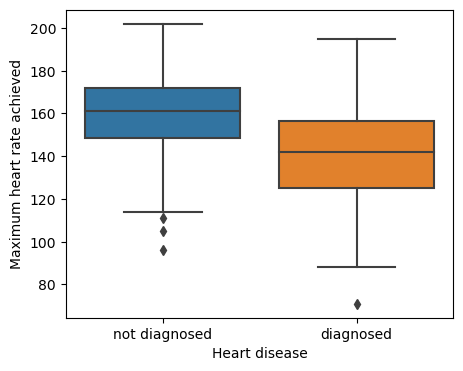

In [110]:
## Plot the boxplot 
plt.figure(figsize=(5,4))
sns.boxplot(x = data.heart_disease, y =  data.thalach)
plt.ylabel('Maximum heart rate achieved')
plt.xlabel('Heart disease')

In [122]:
thalach_diag = data.thalach[data.heart_disease == 'diagnosed']
thalach_not_diag = data.thalach[data.heart_disease == 'not diagnosed']

## Compute their descriptive statistics

print(f'Thalach mean from patients diagnosed with heart disease: {round(thalach_diag.mean(),2)}')
print(f'Thalach median from patients diagnosed with heart disease: {round(thalach_diag.median(),2)}')
print(f'Thalach mean from patients not diagnosed with heart disease: {round(thalach_not_diag.mean(),2)}')
print(f'Thalach median from patients not diagnosed with heart disease: {round(thalach_not_diag.median(),2)}')
print(f'Mean difference: {abs(round(thalach_diag.mean() - thalach_not_diag.mean(),2))}')
print(f'Median difference: {abs(round(thalach_diag.median() - thalach_not_diag.median(),2))}')


Thalach mean from patients diagnosed with heart disease: 139.26
Thalach median from patients diagnosed with heart disease: 142.0
Thalach mean from patients not diagnosed with heart disease: 158.38
Thalach median from patients not diagnosed with heart disease: 161.0
Mean difference: 19.12
Median difference: 19.0


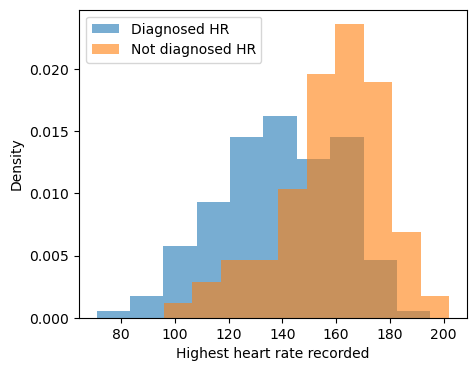

In [144]:
plt.figure(figsize=(5,4))
plt.hist(thalach_diag, alpha = 0.6, label = 'Diagnosed HR', density= True);
plt.hist(thalach_not_diag, alpha = 0.6, label = 'Not diagnosed HR', density= True);
plt.xlabel('Highest heart rate recorded')
plt.ylabel('Density')
plt.legend()

In [127]:
tstat, pval = ttest_ind(thalach_diag, thalach_not_diag)

3.456964908430172e-14